<h2 align="center">Projeto 4</h2>
<p align="center">
  Matéria: Álgebra Linear Numérica<br>
  Professor: Bernardo Freitas<br>
  Alunos: Bruno Ferreira Salvi e Elisa de Oliveira Soares<br>
  Data: 06/2025
</p>


Imports ao longo do trabalho:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

### Questão 1. Matrizes Gaussianas. Uma matriz gaussiana tem todas as entradas Aij independentes e distribuídas segundo uma normal padrão, ou seja, Aij ∼ N (0, 1).

### a) Distribuição das normas. Faça um histograma da norma-2 das colunas de uma matriz gaussiana A, m × n. Use vários valores de m, e comente o que você observa.

Text(0.5, 1.02, 'Histograma das normas-2 das colunas de uma matriz gaussiana')

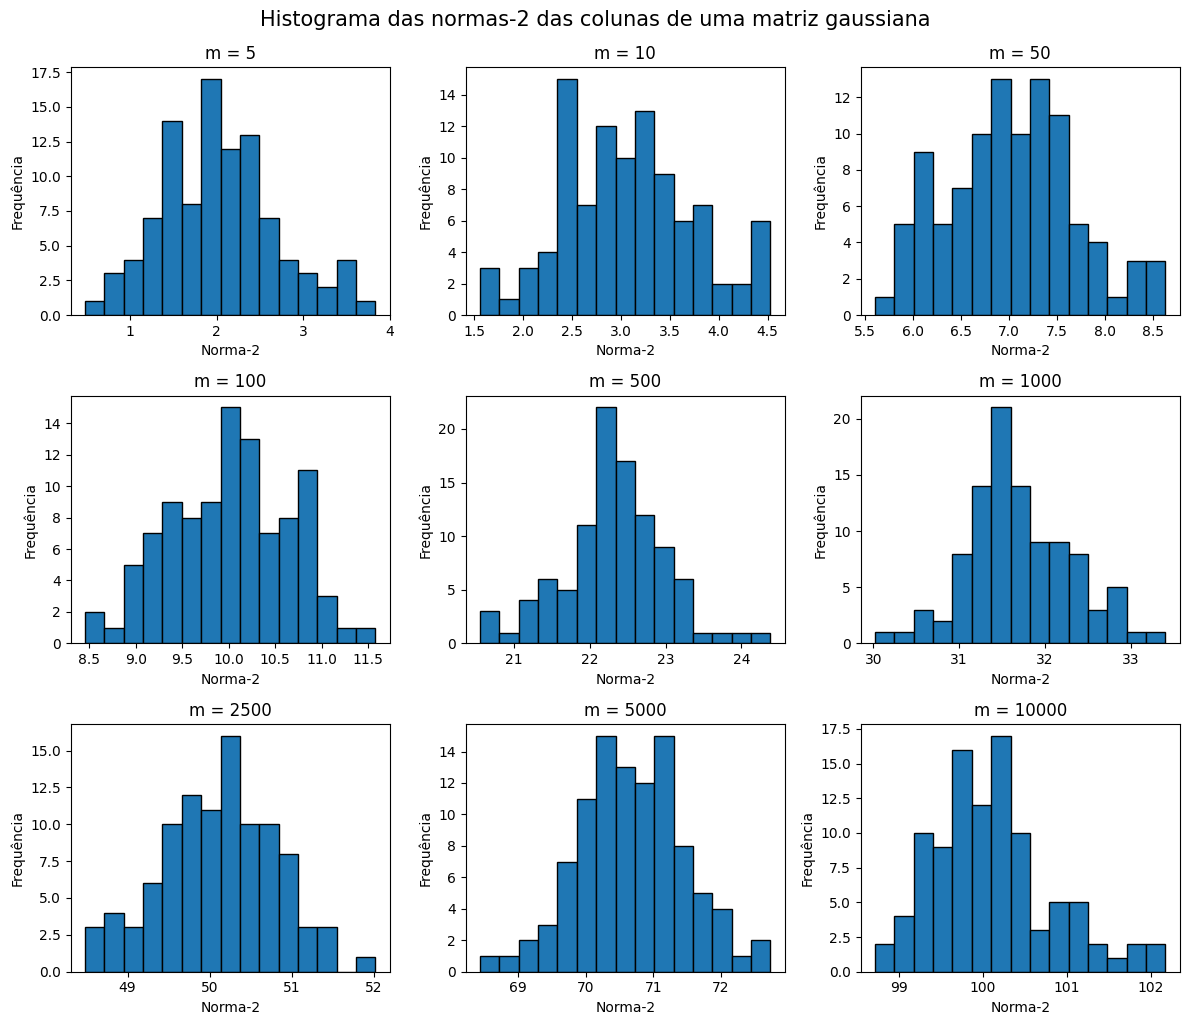

In [2]:
m_s = [5, 10, 50, 100, 500, 1000, 2500, 5000, 10000]
i=0

plt.figure(figsize=(12, 10))

for m in m_s:
    A = np.random.normal(0, 1, size=(m, 100)) # ESCOLHER UM n
    
    # Calcula norma-2 das colunas
    normas = np.linalg.norm(A, axis=0)
    i += 1
    
    # Plota histograma
    plt.subplot(3, 3, i)
    plt.hist(normas, bins=15, edgecolor='black')
    plt.title(f"m = {m}")
    plt.xlabel("Norma-2")
    plt.ylabel("Frequência")

plt.tight_layout()
plt.suptitle("Histograma das normas-2 das colunas de uma matriz gaussiana", fontsize=15, y=1.02)

Ao observarmos os historiogramas, é possível perceber que o valor da norma-2 das colunas é próximo de $\sqrt{m}$. Isso ocorre pois a norma dois de um vetor é $\sqrt{a_1^2 + a_2^2 + \dots + a_m^2}$, para um vetor $1 \times m$, que é o caso de todo vetor da nossa matriz A. Porém, na nossa matriz A, todo elemento é gerado da mesma forma ($a \sim \mathcal{N}(0, 1)$), logo a norma dois do vetor será $\sqrt{m \cdot E(a^2)}$. Como $E(a) = \mu = 0$, $Var (a) = \sigma^2 = 1$, e $Var(a) = E(a^2) - (E(a))^2$, temos que $E(a^2) = Var(a) - (E(a))^2$. Logo, $E(a^2) = 1 - 0^2 = 1$. Assim, temos que a norma 2 do vetor será sempre próximo de $\sqrt{m \cdot E(a^2)} = \sqrt{m \cdot 1}= \sqrt{m}$, como podemos observar no historiograma.

### c) A distribuição do máximo. Queremos ver quão “não ortogonal” é a matriz A. Para isto, vamos estudar o máximo de |⟨Ai,Aj⟩| / ∥Ai∥∥Aj∥ entre colunas distintas de uma matriz gaussiana A. Para isto, gere K = 1000 matrizes gaussianas Ak de ordem 100 × 300, calcule o máximo indicado acima, e faça um histograma dos K valores obtidos.

In [3]:
k1 = 1500

# < Método com loops >
start = time.time()

hist_max_ks_loop = []

def similaridade_cosseno(a, b):
    num = np.abs(np.dot(a, b))
    den = np.linalg.norm(a) * np.linalg.norm(b)
    return num / den

for _ in range(k1):
    A = np.random.normal(0, 1, (100, 300))
    hist_ks = []
    for i in range(len(A.T)):
        for j in range(i + 1, len(A.T)):
            a = similaridade_cosseno(A[:, i], A[:, j])
            hist_ks.append(a)

    hist_max_ks_loop.append(np.max(hist_ks))

end = time.time()
tempo_loop = end - start


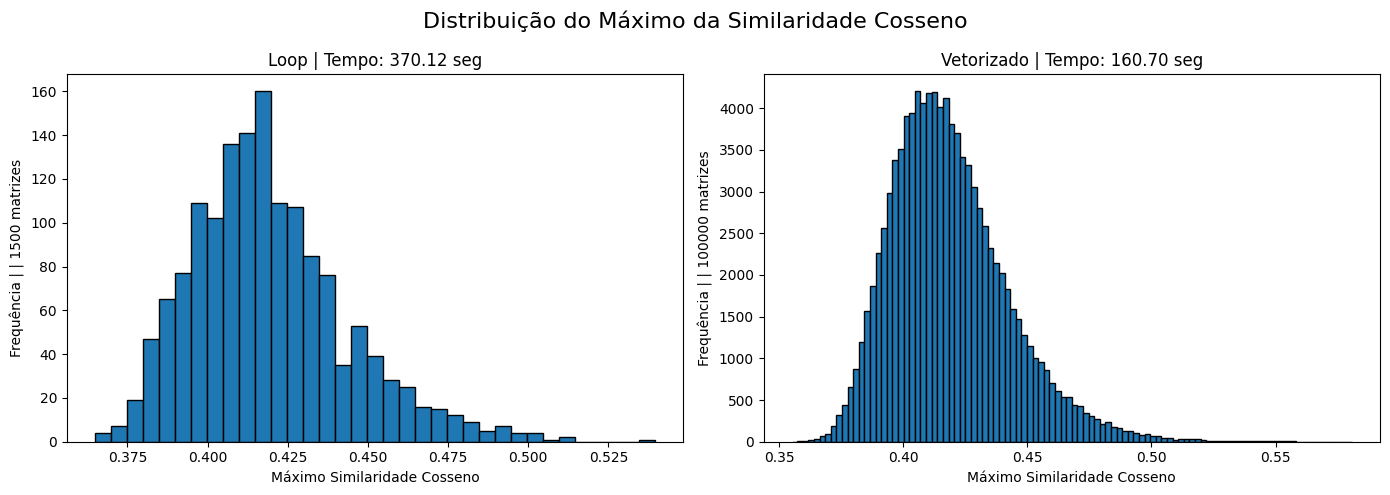

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(hist_max_ks_loop, bins=35, edgecolor='black')
axes[0].set_title(f"Loop | Tempo: {tempo_loop:.2f} seg")
axes[0].set_xlabel("Máximo Similaridade Cosseno")
axes[0].set_ylabel(f"Frequência | | {k1} matrizes")

k2 = 100000

# < Método verotizado >
start = time.time()

hist_max_ks_vec = []

for _ in range(k2):
    A = np.random.normal(0, 1, (100, 300))

    norms = np.linalg.norm(A, axis=0)
    A_normalizado = A / norms

    S = np.abs(A_normalizado.T @ A_normalizado)
    np.fill_diagonal(S, 0)

    hist_max_ks_vec.append(np.max(S))

end = time.time()
tempo_vec = end - start


axes[1].hist(hist_max_ks_vec, bins=100, edgecolor='black')
axes[1].set_title(f"Vetorizado | Tempo: {tempo_vec:.2f} seg")
axes[1].set_xlabel("Máximo Similaridade Cosseno")
axes[1].set_ylabel(f"Frequência | | {k2} matrizes")

plt.suptitle("Distribuição do Máximo da Similaridade Cosseno", fontsize=16)
plt.tight_layout()


### d) Complexidade computacional. Qual a complexidade de calcular o máximo acima? Qual valor de K você acha que seria bom para ter uma boa estimativa do máximo esperado?

Tomando K o número de matrizes Anxm calculadas, por iteração, calculamos m(m-1)/2 produtos internos, cada produto interno tem custo assintótico n, chegamos que a complexidade computacional de calcular o máximo acima, será O(K.m(m-1)/2.n) o que assintoticamente seria O(K.m².n) ou O(m².n) por iteração.

Foi computado a similariade do cosseno das colunas de A 100x300 para matrizes distintas de duas formas: a primeira é o "método didácito" que usa várias estruturas de repetição em python, sem se importar com a performática do código; a segunda forma, mas otimizada, normaliza as colunas de A, pode-se fazer isso pois 





